In [1]:
import numpy as np
np.random.seed(42)

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

(784,)

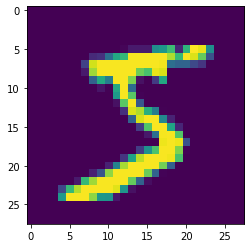

In [3]:
data_0 = mnist.data[0].reshape(28,28)
plt.imshow(data_0)

mnist.data[0].shape

In [4]:
mnist.target[0]

'5'

In [5]:
X,y = mnist.data,mnist.target

In [6]:
y = y.astype(int)

In [7]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

# Binary classification

In [10]:
y_train5 = y_train==5
y_test5 = y_test==5

In [9]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(tol=1e-3,random_state=42)
sgd_clf.fit(X_train,y_train5)



array([0.95035, 0.96035, 0.9604 ])

In [19]:
pred_train=sgd_clf.predict(X_train)

In [13]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score, recall_score

accuracy_score(y_train5,pred_train)

0.9522666666666667

In [14]:
precision_score(y_train5,pred_train)

0.6805026118876183

In [15]:
recall_score(y_train5,pred_train)

0.8891348459693783

In [24]:
pred_train=np.array([False]*60000)

In [25]:
accuracy_score(y_train5,pred_train)

0.90965

In [28]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train5, y_scores)

NameError: name 'y_scores' is not defined

In [27]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train5, cv=3)

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)